## **Analisis a futuro - Metodo de Montecarlo**
Creador: Juan Cassinerio

El metodo de prediccion financiera por **Metodo de Montecarlo** posibles futuros en relacion a comportamientos pasados, distribucion gaussiana de rendimientos en anos previos.

Utilizaremos informacion financiera del precio de la accion de una emrpesa importada de https://finance.yahoo.com/

In [ ]:
pip install yfinance

[*********************100%***********************]  1 of 1 completed


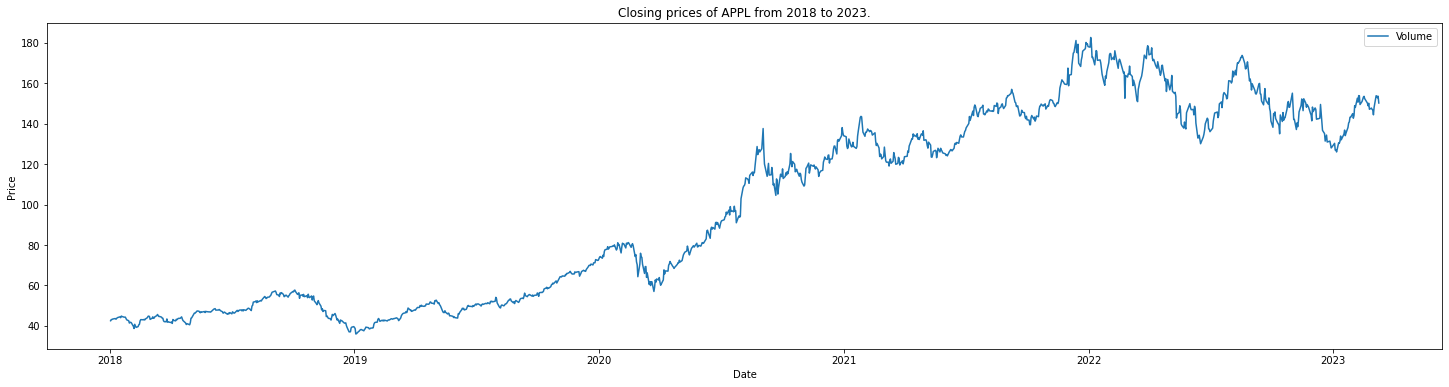

In [ ]:
# Import required libraries
import numpy as np  
import pandas as pd  
import math
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

ticker = 'AAPL'
df=yf.download(ticker,start='2018-1-1')

# Plot the first and second columns of the dataframe
plt.figure(figsize=(25, 6))
plt.plot(df.iloc[:,0], label=df.columns[5])

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Closing prices of APPL from 2018 to 2023.')
plt.show()

In [ ]:
#Next, we calculate the number of days that have elapsed in our chosen time window
time_elapsed = (df.index[-1] - df.index[0]).days

#Current price / first record, the total growth %
total_growth = (df['Adj Close'][-1] / df['Adj Close'][1])

number_of_years = time_elapsed / 365.0

#mean annual growth rate
cagr = total_growth ** (1/number_of_years) - 1

#standard deviation of the DAILY price changes
std_dev = df['Adj Close'].pct_change().std()

#annualized volatility, ~252 trading days in a year

number_of_trading_days = 252
std_dev = std_dev * math.sqrt(number_of_trading_days)

print ("mean returns +/- std_dev= ", str(round(cagr,4))   ,"+/-", str(round(std_dev,4)))      


mean returns +/- std_dev=  0.2824 +/- 0.3325


In [ ]:
#Generate random values for 1 year's worth of trading (252 days),
#using numpy and assuming a normal distribution
daily_return_percentages = np.random.normal(cagr/number_of_trading_days, std_dev/math.sqrt(number_of_trading_days),number_of_trading_days)+1

#Now that we have created a random series of future daily return %s, the 'random walk'

price_series = [df['Adj Close'][-1]]

for j in daily_return_percentages:
    price_series.append(price_series[-1] * j)

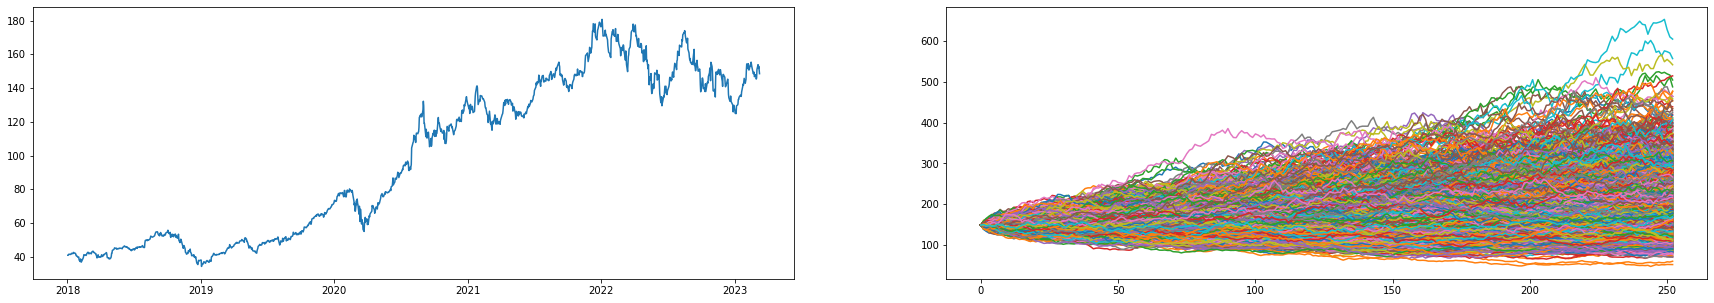

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(30, 5))

ax1.plot(df.iloc[:,4], label=df.columns[4])

#Now that we've created a single random walk above we can simulate this process over a large sample size to get a better sense of the true expected distribution
number_of_trials = 3000
closing_prices = []

for i in range(number_of_trials):
    #calculate randomized return percentages following our normal distribution
    #and using the mean / std dev we calculated above
    daily_return_percentages = np.random.normal(cagr/number_of_trading_days, std_dev/math.sqrt(number_of_trading_days),number_of_trading_days)+1
    price_series = [df['Adj Close'][-1]]

    for j in daily_return_percentages:
        #extrapolate price out for next year
        price_series.append(price_series[-1] * j)

    #append closing prices in last day of window for histogram
    closing_prices.append(price_series[-1])

    #plot all random walks
    ax2.plot(price_series)

plt.show()

Current Price:  148.5
Expected price:  198.35
Quantile (10%):  123.13952807445447
Quantile (90%):  286.8309704090479


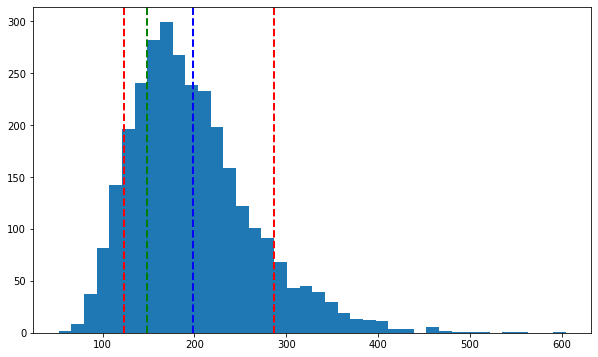

In [ ]:
#lastly, we can split the distribution into percentiles
#to help us gauge risk vs. reward

#Pull top 10% of possible outcomes
top_ten = np.percentile(closing_prices,90)

#Pull bottom 10% of possible outcomes
bottom_ten = np.percentile(closing_prices,10);

#from here, we can check the mean of all ending prices
#allowing us to arrive at the most probable ending point
mean_end_price = round(np.mean(closing_prices),2)

print("Current Price: ", df['Adj Close'][-1])
print("Expected price: ", mean_end_price)
print("Quantile (10%): ",bottom_ten)
print("Quantile (90%): ",top_ten)

plt.figure(figsize=(10, 6))
plt.hist(closing_prices,bins=40)
plt.axvline(top_ten,color='r',linestyle='dashed',linewidth=2)
plt.axvline(bottom_ten,color='r',linestyle='dashed',linewidth=2)
plt.axvline(df['Adj Close'][-1],color='g', linestyle='dashed',linewidth=2)
plt.axvline(mean_end_price,color='b', linestyle='dashed',linewidth=2)

plt.show()